In [2]:
import pandas as pd
import seaborn as sns

/Users/yarinr25/anaconda3/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
from infra.data_loader import DataLoader
data_loader_test = DataLoader('')

In [4]:
content = data_loader_test._read_docx('Data/תיאור התמונות.docx')
data = data_loader_test._extract_data(content)

In [5]:
ground_truth_df = pd.DataFrame([data])
ground_truth_df

,תמונה 1,תמונה 2,תמונה 3,תמונה 4,תמונה 5,תמונה 6,תמונה 7,תמונה 8,תמונה 9,תמונה 10,תמונה 11,תמונה 12,תמונה 13,תמונה 14
0,ילד יושב ליד שולחן ומביט בכינור המוצב על השולח...,"סצנה כפרית עם אישה מחזיקה ספר בחזית. ברקע, גבר...",ילד מצטופף ליד ספה. על הרצפה לידו נמצא חפץ דו-...,אישה אוחזת בכתפיו של גבר שפונה ממנה.,אישה מביטה לתוך חדר מסף דלת.,אישה מבוגרת עומדת במקביל לחלון. מאחוריה גבר צע...,ילדה צעירה יושבת על ספה ומחזיקה בובה בידיה. מא...,ילד צעיר בחזית בוהה ישירות מחוץ לתמונה. ברקע ת...,ארבעה גברים בשדה שוכבים זה מול זה.,אדם אחד מחזיק את ראשו כנגד כתפו של אדם אחר. מי...,אדם עם ידו מורמת עומד מעל ילד השוכב על מיטה בע...,ילד יושב בפתח של בקתת עץ.,צללית של אדם מול חלון,אישה עומדת ליד דלת פתוחה כשיד אחת אוחזת בצד הד...


In [6]:
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
patients_df = pd.read_csv('Data/clean_data.csv')
patients_df.head()

,תמונה 1,תמונה 2,תמונה 3,תמונה 4,תמונה 5,תמונה 6,תמונה 7,תמונה 8,תמונה 9,תמונה 10,תמונה 11,תמונה 12,תמונה 13,תמונה 14,בר מצווה,מה אוהב לעשות,מה מעצבן,משאלות לעתיד,label,file_name
0,טוב אז יש פה ילד שהמשפחה שלו קנתה לו כינור במת...,"טוב אז פה רואים מישהי שנפרדה מהבן זוג שלה. זה,...","יש פה מישהו בעצם לא, זה נראה מישהי. שהיא בוכה,...","טוב זה נראה כמו דמויות משנות ה60 כזה, לא יודעת...","יש פה מישהי בבית שלה, היא קמה עכשיו משינה. היא...","טוב, רואים פה אמא ובן. היא נראת כמו אמא שלו. ה...","טוב, יש פה אמא ובת. אה, הבת מחזיקה תינוק? מה ה...","אוי, זה נראה שמבצעים ניתוח בבן אדם. יש פה שני ...",טוב יש פה קבוצה של אנשים שהם עייפים אחרי יום ע...,"טוב יש פה מישהו שנראה שהוא ישן, אבל בגלל שמישה...","טוב, יש פה אישה ששוכבת במיטה. וגבר שמפנה לה את...","טוב, יש פה ילד קטן שיושב בכניסה לאיזשהו מבנה. ...","טוב, יש פה כל התמונה שחורה, אבל זה לא נראה שחו...","טוב, יש פה מישהי שבוכה בכניסה לבית שלה. אולי מ...",טוב אז לבת מצווה שלי ההורים שלי עשו לי טיול בה...,"טוב, אז מה שאני אוהבת לעשות זה לאפר, זה מה שאנ...",אז מה שמעצבן אותי זה לקוחות מעצבנים שמוציאים א...,"טוב, משהו שהייתי רוצה לעשות בעתיד נראה לי זה מ...",0,ש16.docx
1,"אוקיי, זה ילד שזה בערך בשנות ה20 מרוסיה, ואמרו...",טוב לדעתי זה בשנות כזה ה40 בערך. יש פה מישהי ב...,"טוב זאת אמא שהתינוק שלה בכה כל הלילה, והיא הגי...",טוב לדעתי אני מסתכלת פה על חשפנית שהתאהבה באיז...,"זאת אישה נשואה שבעלה לא בבית, ויש את המשרד שלו...","זה הנכד של הסבתא שבדיוק בעלה נפטר, והוא מחפש א...","זו בת למשפחה מאוד אמידה, שבדיוק התחילה השואה, ...","כן, זה סופר שרוצה לכתוב על זמן המלחמה, על הקשי...","זה ישראל לפני הקמת המדינה, ויש את החקלאים שעוב...","זה אב ששכל, שכל או שכל את בנו והוא ברגע של כזה...",אז יש פה בעל ואישה שהוא נכנס לה לחדר בזמן שהיא...,זה ילד קטן וחמוד שגדל בעוני וההורים שלו עובדים...,זה תמונה של מישהו שנמצא בטיפול פסיכולוגי והוא ...,זו אישה שהרגע הודיעו לה איזושהי בשורה מאוד מאו...,"הבת מצווה שלי, אני בכלל לא רציתי לעשות בת מצוו...",ההנאה שלי זה המשפחה שלי שאיתי וגיא והבן שלי וב...,"אוקיי לא הרבה מעצבן אותי, אבל מה שמעצבן אותי ז...",אוקיי יש לי כמה דברים שאני רוצה לעשות בעתיד. א...,0,י20.docx
2,"מה שקורה עכשיו זה שהילד מסתכל על כינור, לפי דע...","מה שקורה עכשיו זה בחורה שנמצאת בכפר כזה, של כפ...","יש פה מישהי מאוד עצובה, כאילו זה אפילו מעבר לז...","כרגע יש פה זוג, שהם פשוט, האישה רוצה את הגבר י...","רואים פה אמא שנכנסת לחדר, בודקת אני מניחה עם ה...","מה שנראה פה זה אמא מבוגרת יחסית, ולדעתי זה הבן...","כאן רואים, או אמא מודאגת או עוזרת בית שהיא מוד...",אוקיי אז רואים פה שני אנשים עושים ניסוי או סוג...,"כאן רואים חיילים במנוחה בין העבודות שלהם, בין ...","כאן רואים אישה שוכבת, וגבר שמנסה להתקרב אליה ע...","כאן נראת אישה ששוכבת ערומה, במיטה. וגבר, כן, כ...",בתמונה רואים ילד שמחכה להורים. ילד ממש קטן בן ...,"בתמונה רואים ממש הכל חשוך ורק פתח אור קטן, כנר...",כאן נראת מישהי שהרגע קיבלה בשורה מאוד מאוד קשה...,אוקיי המסיבת בת מצווה שלי היא קצת הייתה לא כמו...,"אני מאוד אוהבת להיות עם אנשים, זה תמיד משהו שא...","הרבה דברים מעצבנים אותי, אבל אני חושבת שהכי עי...",אני חושבת שבעתיד הייתי רוצה מאוד לעבוד עם אנשי...,0,ש4.docx
3,זה מזכיר לי לד כזה שחי בתקופה ישנה שהוא נמצא ב...,טוב בהווה זה נראה לי גם תקופה ישנה כזאת שהחקלא...,"טוב פה אני רואה, אני חושב שזה אישה אני לא בטוח...","טוב, אז פה אני רואה גבר ואישה שהם כנראה יוצאים...","טוב, אז לפני הסיטואציה שבתמונה אני רואה, אני י...","אז פה זה נראה לי כאילו, שוב הם לבושים האנשים ...","טוב אז מה שאני רואה בתמונה בהווה, זה שתי נשים ...","טוב מה שקורה ברקע של התמונה אני רואה אנשים, שו...","טוב, מה שאני רואה בתמונה זה ככה אני מנחש שזה, ...","טוב, מה שאני רואה פה בתמונה זה, זה איזה נער כז...","טוב זה, מה שהיה לפני המצב בתמונה אני רואה אישה...","טוב אני רואה פה ילד, גם בתקופה ישנה כזה. זה נר...",מה שקורה בתמונה זה זה פשוט בן אדם שנמצא באזור ...,טוב אז אני רואה פה בתמונה אישה מאוד מבואסת ממש...,אני לא זוכר שחגגתי או משהו עם חברים את הבר מצו...,מה השאלה? אז בראש ובראשונה זה לנגן בגיטרה ולדב...,מעצבן אותי מאוד שאני לא עומד בדרישות שלי לעצמי...,"אז אני רוצה בעתיד, החלום הכי גדול שלי זה להיות...",0,י16.docx
4,"עכשיו הילד, כנראה הוא לא קיבל כינור יוקרתי, וק...","הם מסתכלים איך היה ל

In [8]:
patients_df.columns

Index(['תמונה 1', 'תמונה 2', 'תמונה 3', 'תמונה 4', 'תמונה 5', 'תמונה 6',
       'תמונה 7', 'תמונה 8', 'תמונה 9', 'תמונה 10', 'תמונה 11', 'תמונה 12',
       'תמונה 13', 'תמונה 14', 'בר מצווה', 'מה אוהב לעשות', 'מה מעצבן',
       'משאלות לעתיד', 'label', 'file_name'],
      dtype='object')

In [ ]:
from feature_extraction.morphological import MorphologicalFeatureExtractor

feat_extractor = MorphologicalFeatureExtractor()


In [10]:
embeddings_df = pd.DataFrame()
embeddings_df['label'] = patients_df['label']
pic_columns = [col for col in patients_df.columns if 'תמונה' in col]

for col in pic_columns:
    embeddings_df[col] = patients_df[col].apply(feat_extractor.get_sentence_embedding)


In [11]:
ground_truth_embeddings_df = pd.DataFrame()

for col in ground_truth_df.columns:
    ground_truth_embeddings_df[col] = ground_truth_df[col].apply(feat_extractor.get_sentence_embedding)

In [12]:
distances_df = pd.DataFrame(columns=embeddings_df.columns)

for col in distances_df:
    if col == 'label':
        distances_df[col] = embeddings_df[col]
    else:
        ground_truth_embedding = ground_truth_embeddings_df[col].iloc[0]
        distances_df[col] = embeddings_df[col].apply(lambda x: cosine_similarity([ground_truth_embedding], [x])[0][0])


In [13]:
pic_to_check = 'תמונה 13'
index = 77
cosine_similarity([feat_extractor.get_sentence_embedding(ground_truth_df[pic_to_check].iloc[0])],
                  [feat_extractor.get_sentence_embedding(patients_df[pic_to_check].iloc[index])])

array([[0.7432706]], dtype=float32)

In [14]:
patients_df.label.value_counts()

0    59
1    21
Name: label, dtype: int64

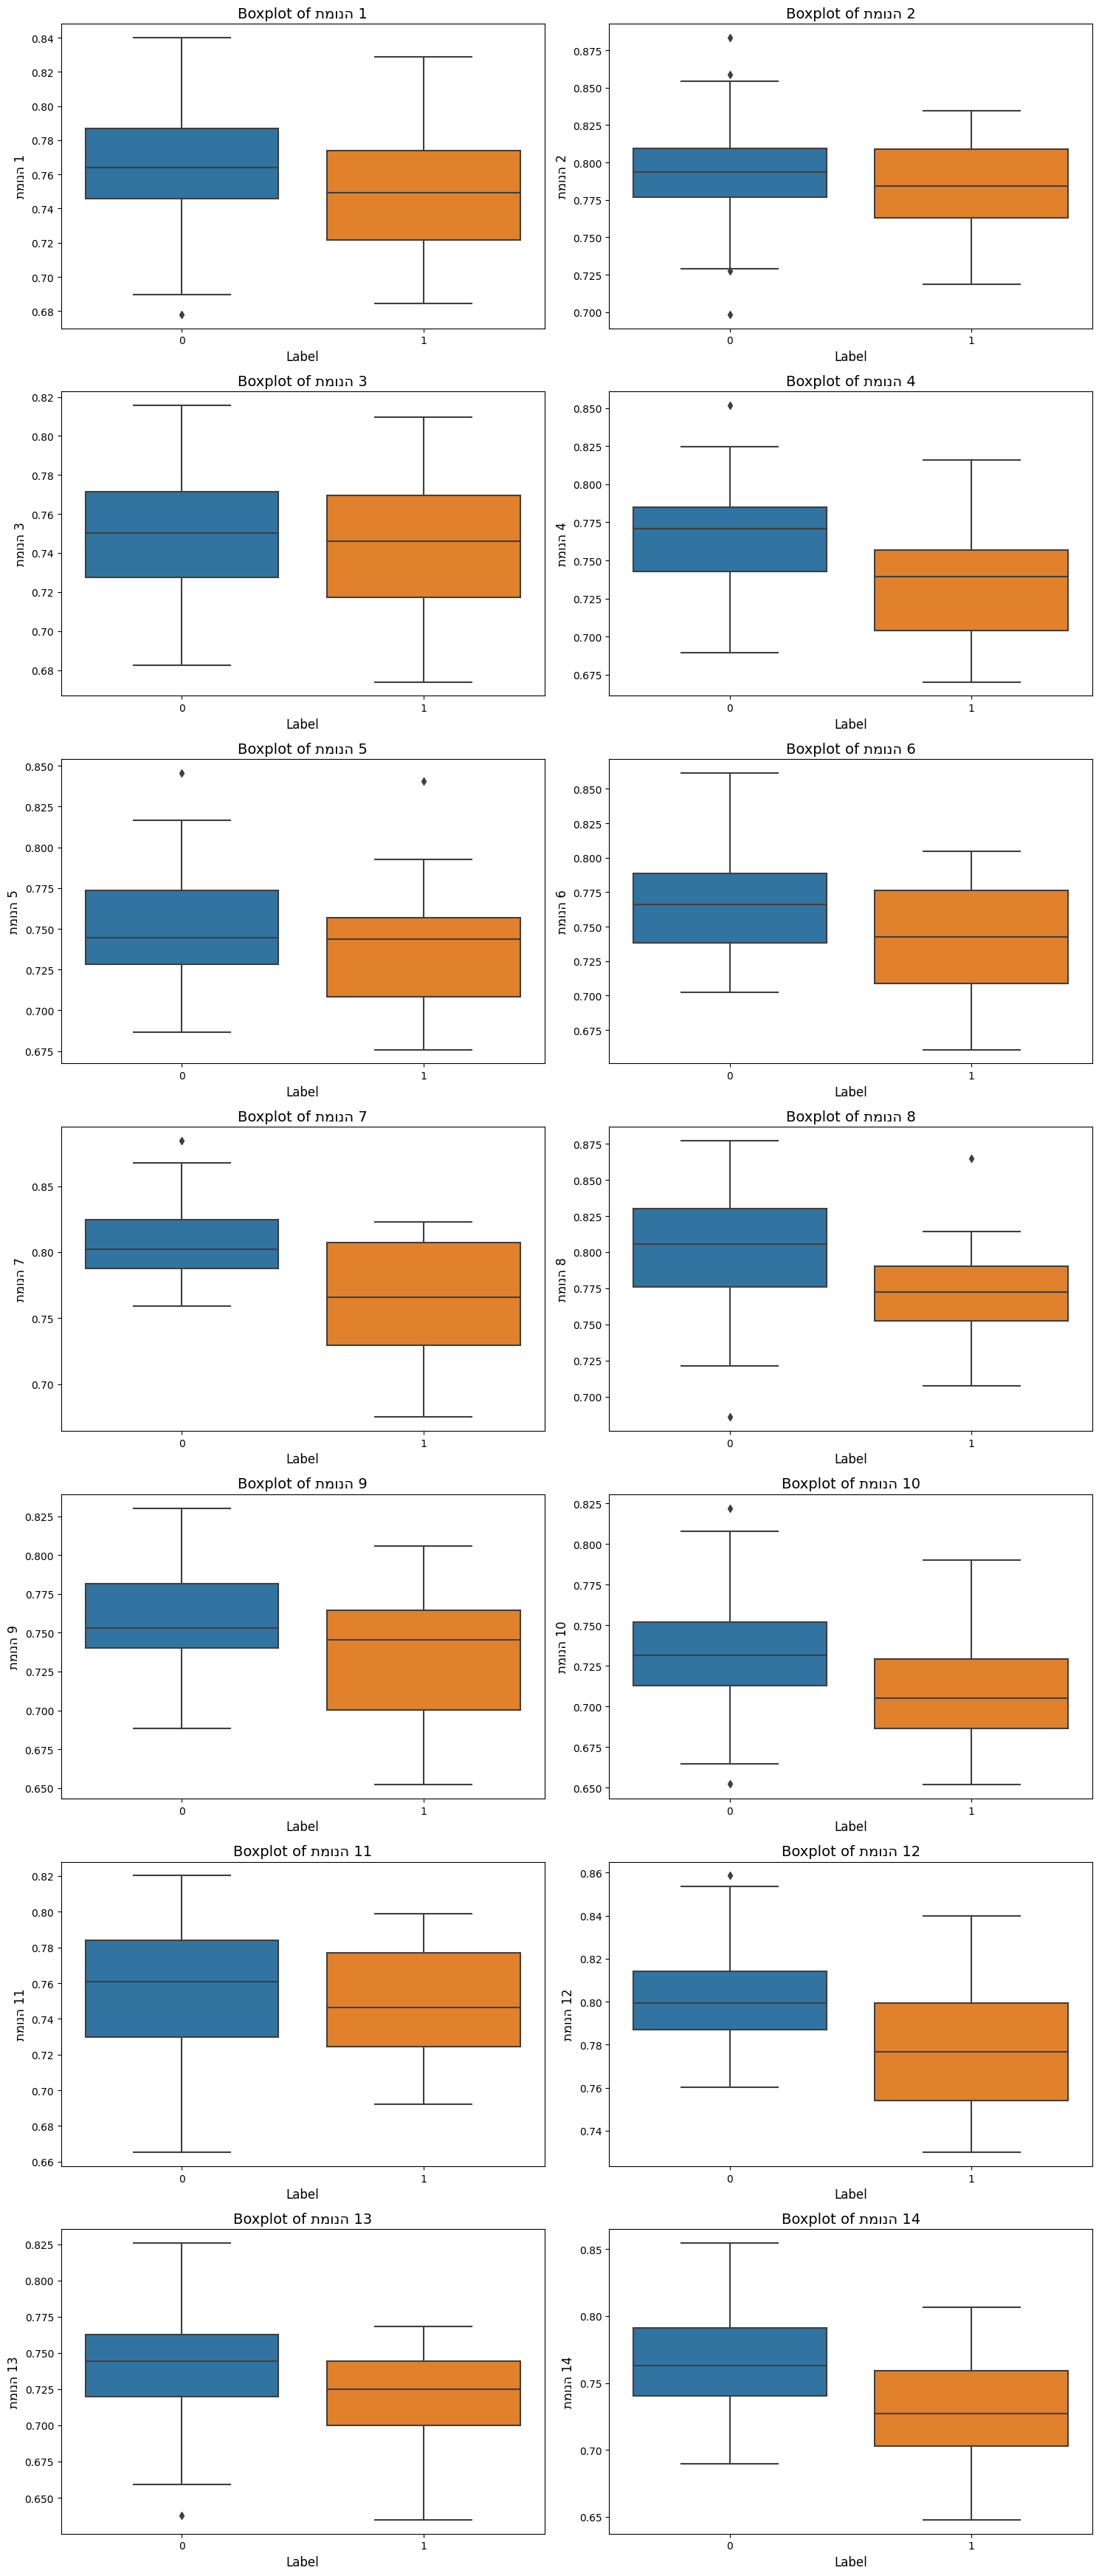

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



df = distances_df.copy()

# Create a grid of boxplots
features = df.columns.drop('label')  # Exclude the 'label' column

# Determine the number of rows and columns for the grid
num_features = len(features)
num_cols = 2
num_rows = (num_features + 1) // num_cols

# Increase the figure size for better visibility
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes array if there are multiple rows
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(features):
    sns.boxplot(x='label', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}', fontsize=14)
    axes[i].set_xlabel('Label', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)

# Remove any empty subplots (if the number of features is odd)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


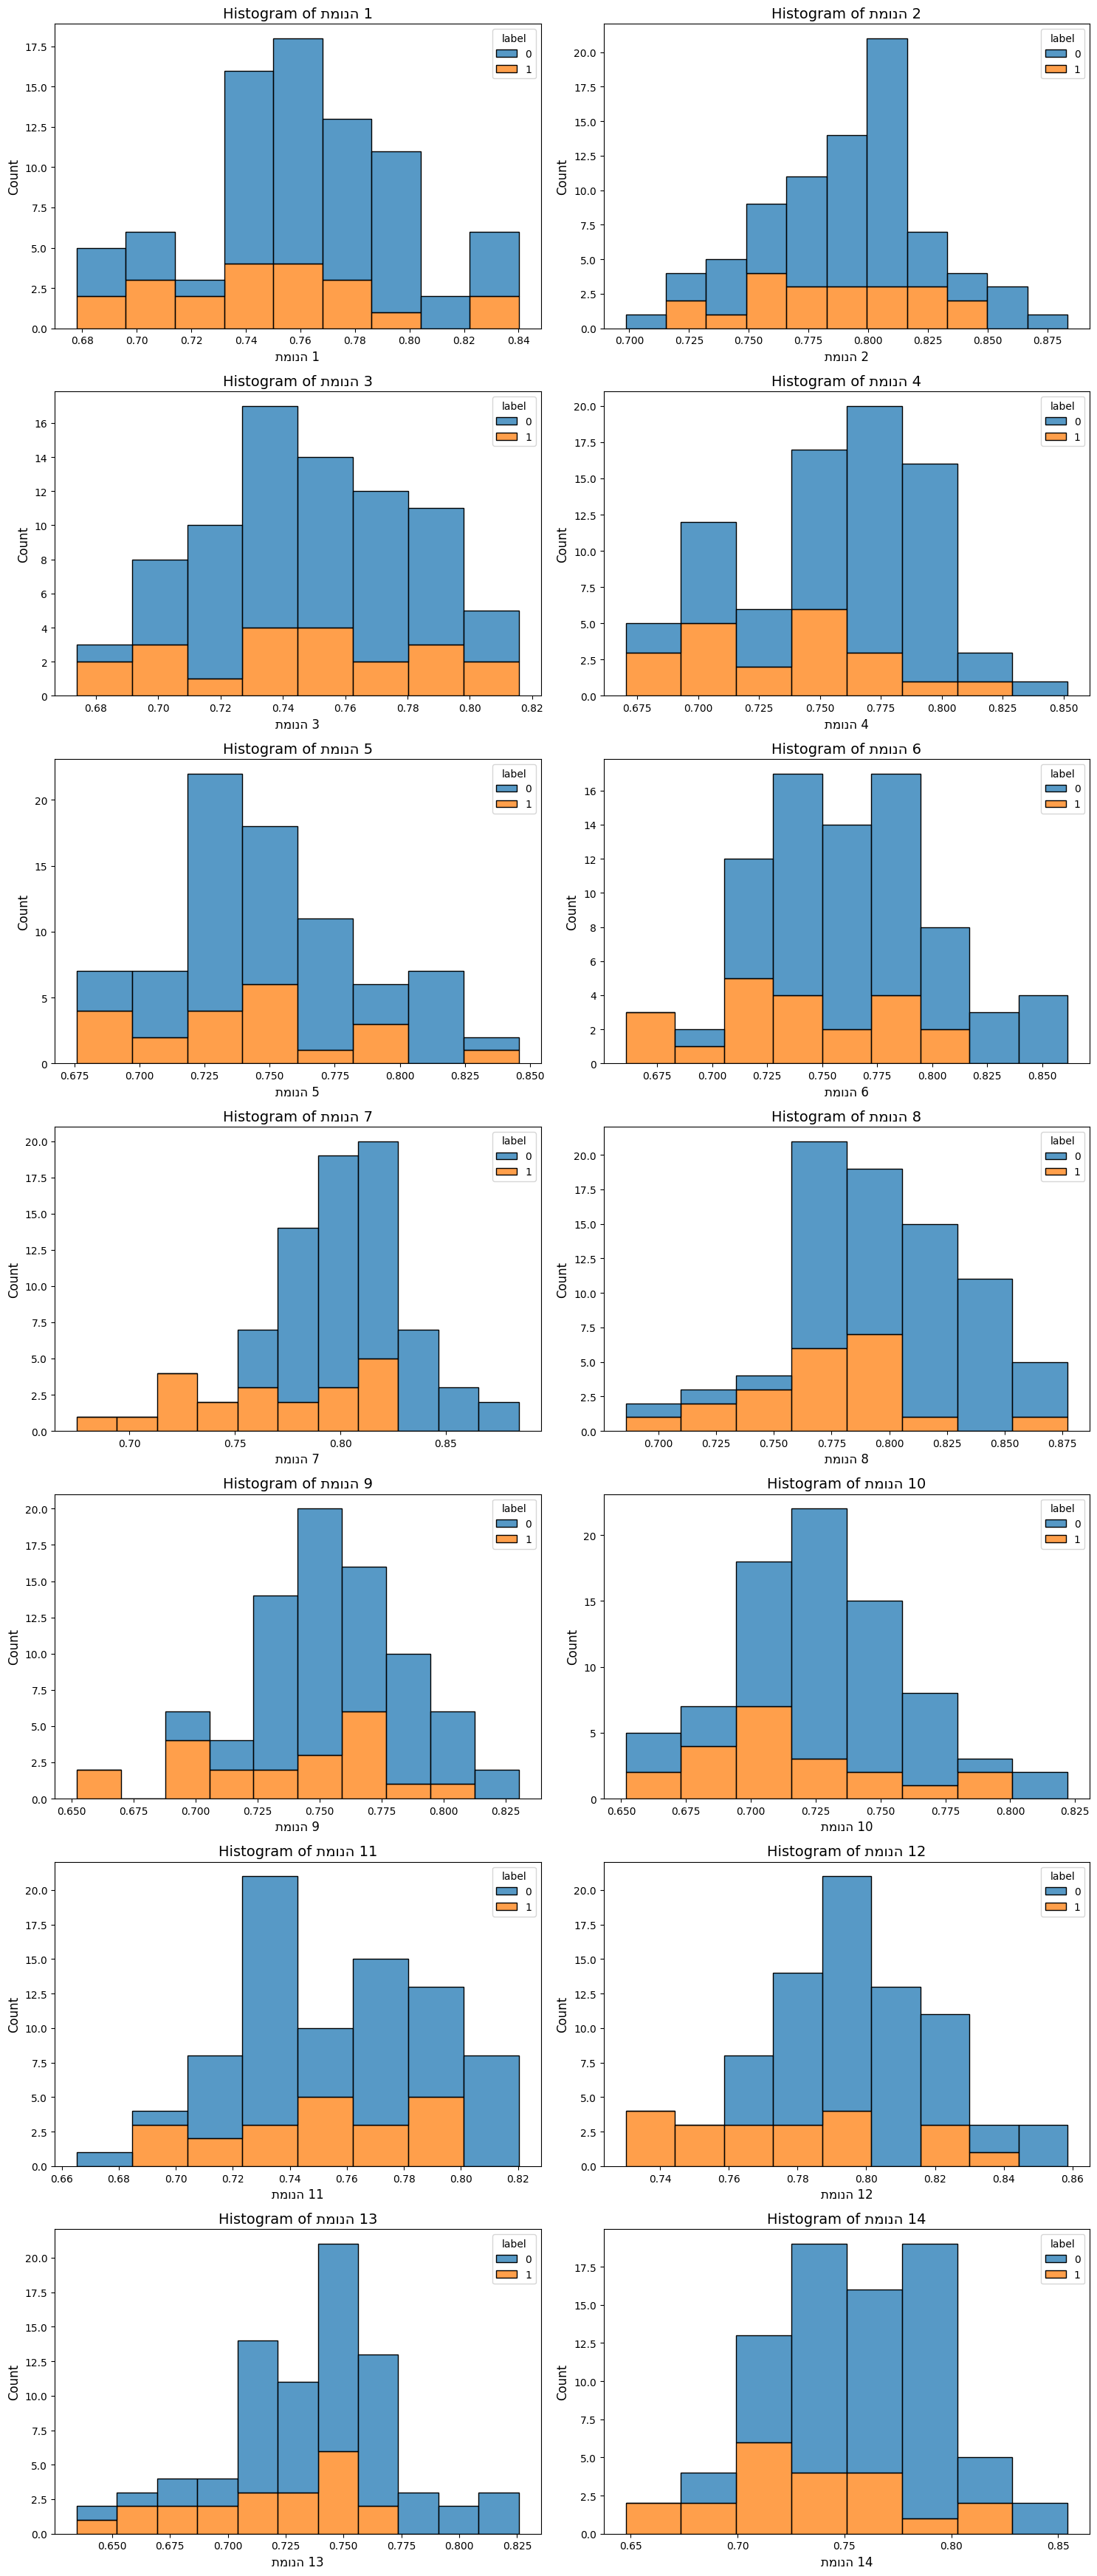

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



df = distances_df.copy()

# Create a grid of histograms
features = df.columns.drop('label')  # Exclude the 'label' column

# Determine the number of rows and columns for the grid
num_features = len(features)
num_cols = 2
num_rows = (num_features + 1) // num_cols

# Increase the figure size for better visibility
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes array if there are multiple rows
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue='label', multiple='stack', ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

# Remove any empty subplots (if the number of features is odd)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


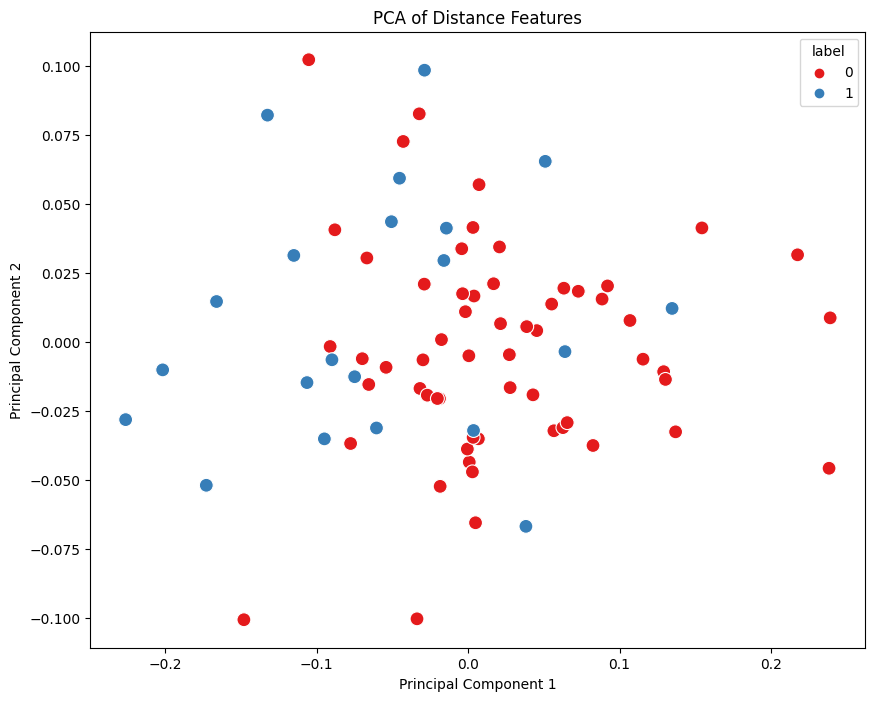

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Example DataFrame
# Assuming df is your DataFrame with 14 columns of distances and a 'label' column
# Replace this with your actual DataFrame

df = distances_df.copy()

# Extract the features and the label
X = df.drop(columns=['label'])
y = df['label']

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, y.reset_index(drop=True)], axis=1)

# Plotting the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df, palette='Set1', s=100)
plt.title('PCA of Distance Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns


df = distances_df.copy()
# Extract the features and the label
X = df.drop(columns=['label'])
y = df['label']

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df = pd.concat([tsne_df, y.reset_index(drop=True)], axis=1)

# Plotting the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='label', data=tsne_df, palette='Set1', s=100)
plt.title('t-SNE of Distance Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [2]:
from infra.data_loader import DataLoader

data_loader = DataLoader('data')  # Update with your data directory
data_loader.load_data()
df = data_loader.get_dataframe()

# Display the DataFrame
df.head(35)

,תמונה 1,תמונה 2,תמונה 3,תמונה 4,תמונה 5,תמונה 6,תמונה 7,תמונה 8,תמונה 9,תמונה 10,תמונה 11,תמונה 12,תמונה 13,תמונה 14,בר מצווה,מה אוהב לעשות,מה מעצבן,משאלות לעתיד,label,file_name
0,טוב אז יש פה ילד שהמשפחה שלו קנתה לו כינור במת...,"טוב אז פה רואים מישהי שנפרדה מהבן זוג שלה. זה,...","יש פה מישהו בעצם לא, זה נראה מישהי. שהיא בוכה,...","טוב זה נראה כמו דמויות משנות ה60 כזה, לא יודעת...","יש פה מישהי בבית שלה, היא קמה עכשיו משינה. היא...","טוב, רואים פה אמא ובן. היא נראת כמו אמא שלו. ה...","טוב, יש פה אמא ובת. אה, הבת מחזיקה תינוק? מה ה...","אוי, זה נראה שמבצעים ניתוח בבן אדם. יש פה שני ...",טוב יש פה קבוצה של אנשים שהם עייפים אחרי יום ע...,"טוב יש פה מישהו שנראה שהוא ישן, אבל בגלל שמישה...","טוב, יש פה אישה ששוכבת במיטה. וגבר שמפנה לה את...","טוב, יש פה ילד קטן שיושב בכניסה לאיזשהו מבנה. ...","טוב, יש פה כל התמונה שחורה, אבל זה לא נראה שחו...","טוב, יש פה מישהי שבוכה בכניסה לבית שלה. אולי מ...",טוב אז לבת מצווה שלי ההורים שלי עשו לי טיול בה...,"טוב, אז מה שאני אוהבת לעשות זה לאפר, זה מה שאנ...",אז מה שמעצבן אותי זה לקוחות מעצבנים שמוציאים א...,"טוב, משהו שהייתי רוצה לעשות בעתיד נראה לי זה מ...",0,ש16.docx
1,"אוקיי, זה ילד שזה בערך בשנות ה20 מרוסיה, ואמרו...",טוב לדעתי זה בשנות כזה ה40 בערך. יש פה מישהי ב...,"טוב זאת אמא שהתינוק שלה בכה כל הלילה, והיא הגי...",טוב לדעתי אני מסתכלת פה על חשפנית שהתאהבה באיז...,"זאת אישה נשואה שבעלה לא בבית, ויש את המשרד שלו...","זה הנכד של הסבתא שבדיוק בעלה נפטר, והוא מחפש א...","זו בת למשפחה מאוד אמידה, שבדיוק התחילה השואה, ...","כן, זה סופר שרוצה לכתוב על זמן המלחמה, על הקשי...","זה ישראל לפני הקמת המדינה, ויש את החקלאים שעוב...","זה אב ששכל, שכל או שכל את בנו והוא ברגע של כזה...",אז יש פה בעל ואישה שהוא נכנס לה לחדר בזמן שהיא...,זה ילד קטן וחמוד שגדל בעוני וההורים שלו עובדים...,זה תמונה של מישהו שנמצא בטיפול פסיכולוגי והוא ...,זו אישה שהרגע הודיעו לה איזושהי בשורה מאוד מאו...,"הבת מצווה שלי, אני בכלל לא רציתי לעשות בת מצוו...",ההנאה שלי זה המשפחה שלי שאיתי וגיא והבן שלי וב...,"אוקיי לא הרבה מעצבן אותי, אבל מה שמעצבן אותי ז...",אוקיי יש לי כמה דברים שאני רוצה לעשות בעתיד. א...,0,י20.docx
2,"מה שקורה עכשיו זה שהילד מסתכל על כינור, לפי דע...","מה שקורה עכשיו זה בחורה שנמצאת בכפר כזה, של כפ...","יש פה מישהי מאוד עצובה, כאילו זה אפילו מעבר לז...","כרגע יש פה זוג, שהם פשוט, האישה רוצה את הגבר י...","רואים פה אמא שנכנסת לחדר, בודקת אני מניחה עם ה...","מה שנראה פה זה אמא מבוגרת יחסית, ולדעתי זה הבן...","כאן רואים, או אמא מודאגת או עוזרת בית שהיא מוד...",אוקיי אז רואים פה שני אנשים עושים ניסוי או סוג...,"כאן רואים חיילים במנוחה בין העבודות שלהם, בין ...","כאן רואים אישה שוכבת, וגבר שמנסה להתקרב אליה ע...","כאן נראת אישה ששוכבת ערומה, במיטה. וגבר, כן, כ...",בתמונה רואים ילד שמחכה להורים. ילד ממש קטן בן ...,"בתמונה רואים ממש הכל חשוך ורק פתח אור קטן, כנר...",כאן נראת מישהי שהרגע קיבלה בשורה מאוד מאוד קשה...,אוקיי המסיבת בת מצווה שלי היא קצת הייתה לא כמו...,"אני מאוד אוהבת להיות עם אנשים, זה תמיד משהו שא...","הרבה דברים מעצבנים אותי, אבל אני חושבת שהכי עי...",אני חושבת שבעתיד הייתי רוצה מאוד לעבוד עם אנשי...,0,ש4.docx
3,זה מזכיר לי לד כזה שחי בתקופה ישנה שהוא נמצא ב...,טוב בהווה זה נראה לי גם תקופה ישנה כזאת שהחקלא...,"טוב פה אני רואה, אני חושב שזה אישה אני לא בטוח...","טוב, אז פה אני רואה גבר ואישה שהם כנראה יוצאים...","טוב, אז לפני הסיטואציה שבתמונה אני רואה, אני י...","אז פה זה נראה לי כאילו, שוב הם לבושים האנשים ...","טוב אז מה שאני רואה בתמונה בהווה, זה שתי נשים ...","טוב מה שקורה ברקע של התמונה אני רואה אנשים, שו...","טוב, מה שאני רואה בתמונה זה ככה אני מנחש שזה, ...","טוב, מה שאני רואה פה בתמונה זה, זה איזה נער כז...","טוב זה, מה שהיה לפני המצב בתמונה אני רואה אישה...","טוב אני רואה פה ילד, גם בתקופה ישנה כזה. זה נר...",מה שקורה בתמונה זה זה פשוט בן אדם שנמצא באזור ...,טוב אז אני רואה פה בתמונה אישה מאוד מבואסת ממש...,אני לא זוכר שחגגתי או משהו עם חברים את הבר מצו...,מה השאלה? אז בראש ובראשונה זה לנגן בגיטרה ולדב...,מעצבן אותי מאוד שאני לא עומד בדרישות שלי לעצמי...,"אז אני רוצה בעתיד, החלום הכי גדול שלי זה להיות...",0,י16.docx
4,"עכשיו הילד, כנראה הוא לא קיבל כינור יוקרתי, וק...","הם מסתכלים איך היה ל

In [ ]:
df.columns

In [11]:
df.iloc[41]["בר מצווה"]

'אוקיי אז הבר מצווה שלי בעצם הייתה, לפי אם אתם רוצים תאריכים ב6 לאוקטובר 2007. זה היה ארוע  יום כמובן מאוד מרגש, כאילו בשבילי למשפחה, בשביל המשפחה וזה. זה יום שאתה שאתה מתאמן אליו כמובן הרבה זמן, הגעה, עלייה לתורה בכל זאת דבר מיוחד ככה לקרוא בתורה וזה. וזה יום שהרגשתי האמת שקירב אותי ליהדות, לא יודע איך להסביר את זה, כאילו ברור שאני לא, לא הייתי דתי משהו לא נהייתי דתי מזה אבל התחלתי בגלל זה לשמור על כשרות וכאילו יותר כזה להבין את את הדת וזה וזה באמת לא יום שסתם, אומרים שזה אתה עובר מנער לבוגר, כי זה אתה באמת מרגיש כבר משהו כזה. וזה היה יום ממש כיף הרגשתי שכולם כאילו, בעצם כבר פעם ראשונה בערך שאתה מרגיש שבאים בשבילך, כי ברור שלפני זה אתה עושה יום הולדת אבל זה לא באמת נקרא יום הולדת 10 11 12 9 כאלה. אתה באמת מרגיש שיש פה אירוע שכולם באים בשבילך, וכולם, כל המשפחה בעצם באה זורקת עלייך סוכריות זה אירוע כיפי. ובערב של אותו יום אז זה היה, עשינו את האירוע כאילו האירוע של בעצם של הבר מצווה, עשינו את זה בבית שלנו על הגג וגם היה אירוע ממש כיף וגם כאילו באים כולם באים בשבילך גם חברים היו, וממש אפי

In [8]:
df["file_name"][41]

'י9.docx'

In [ ]:
import json


def load_json_data(file_path):
    """Load data from a JSON file and return it as a Python object."""
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def display_sample_data(data, num_samples=5):
    """Display a sample of the data."""
    for i, entry in enumerate(data[:num_samples]):
        print(f"Sample {i+1}:")
        print(f"File Name: {entry['file_name']}")
        print(f"Label: {entry['label']}")
        for question, scores in entry['questions'].items():
            print(f"  {question}: {scores}")
        print()

# Load the JSON data
data_file = "data/word_pred_llm.json"
data = load_json_data(data_file)

# Display a sample of the loaded data
display_sample_data(data)

In [ ]:
data[0]['questions']["תמונה 1"][0]

In [3]:
disorder_df = pd.read_csv("data/processed_disorder_scores.csv")

In [4]:
disorder_df.head()

,תמונה 1,תמונה 2,תמונה 3,תמונה 4,תמונה 5,תמונה 6,תמונה 7,תמונה 8,תמונה 9,תמונה 10,תמונה 11,תמונה 12,תמונה 13,תמונה 14,בר מצווה,מה אוהב לעשות,מה מעצבן,משאלות לעתיד,label,file_name
0,8.340149,8.009934,8.303213,8.031889,7.703416,7.713231,8.183612,7.928562,7.250431,7.933859,7.301499,7.838012,7.599473,7.873984,8.723914,8.244795,8.235790,8.134445,0,ש16.docx
1,8.263302,7.894179,8.380863,8.253998,7.704828,7.927092,7.716895,7.975067,7.186601,7.896481,8.394541,7.569062,8.359622,8.226047,7.499118,8.365946,8.763721,8.259058,0,י20.docx
2,8.112892,7.706177,8.041357,7.648164,8.152513,8.817390,7.622620,8.282854,6.775827,7.290435,7.546795,7.403010,7.304299,7.716173,9.152999,7.321930,7.704547,8.153601,0,ש4.docx
3,7.780240,8.361667,8.456865,8.114954,8.085229,7.717344,8.508278,8.053024,7.837383,7.556489,7.759254,7.665548,7.191672,7.750986,8.019887,8.298576,8.340089,8.710752,0,י16.docx


In [5]:
disorder_df['בר מצווה'][1]

np.float64(7.499117851257324)